In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, RandomizedSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score

import lightgbm as lgb
import seaborn as sb

In [3]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

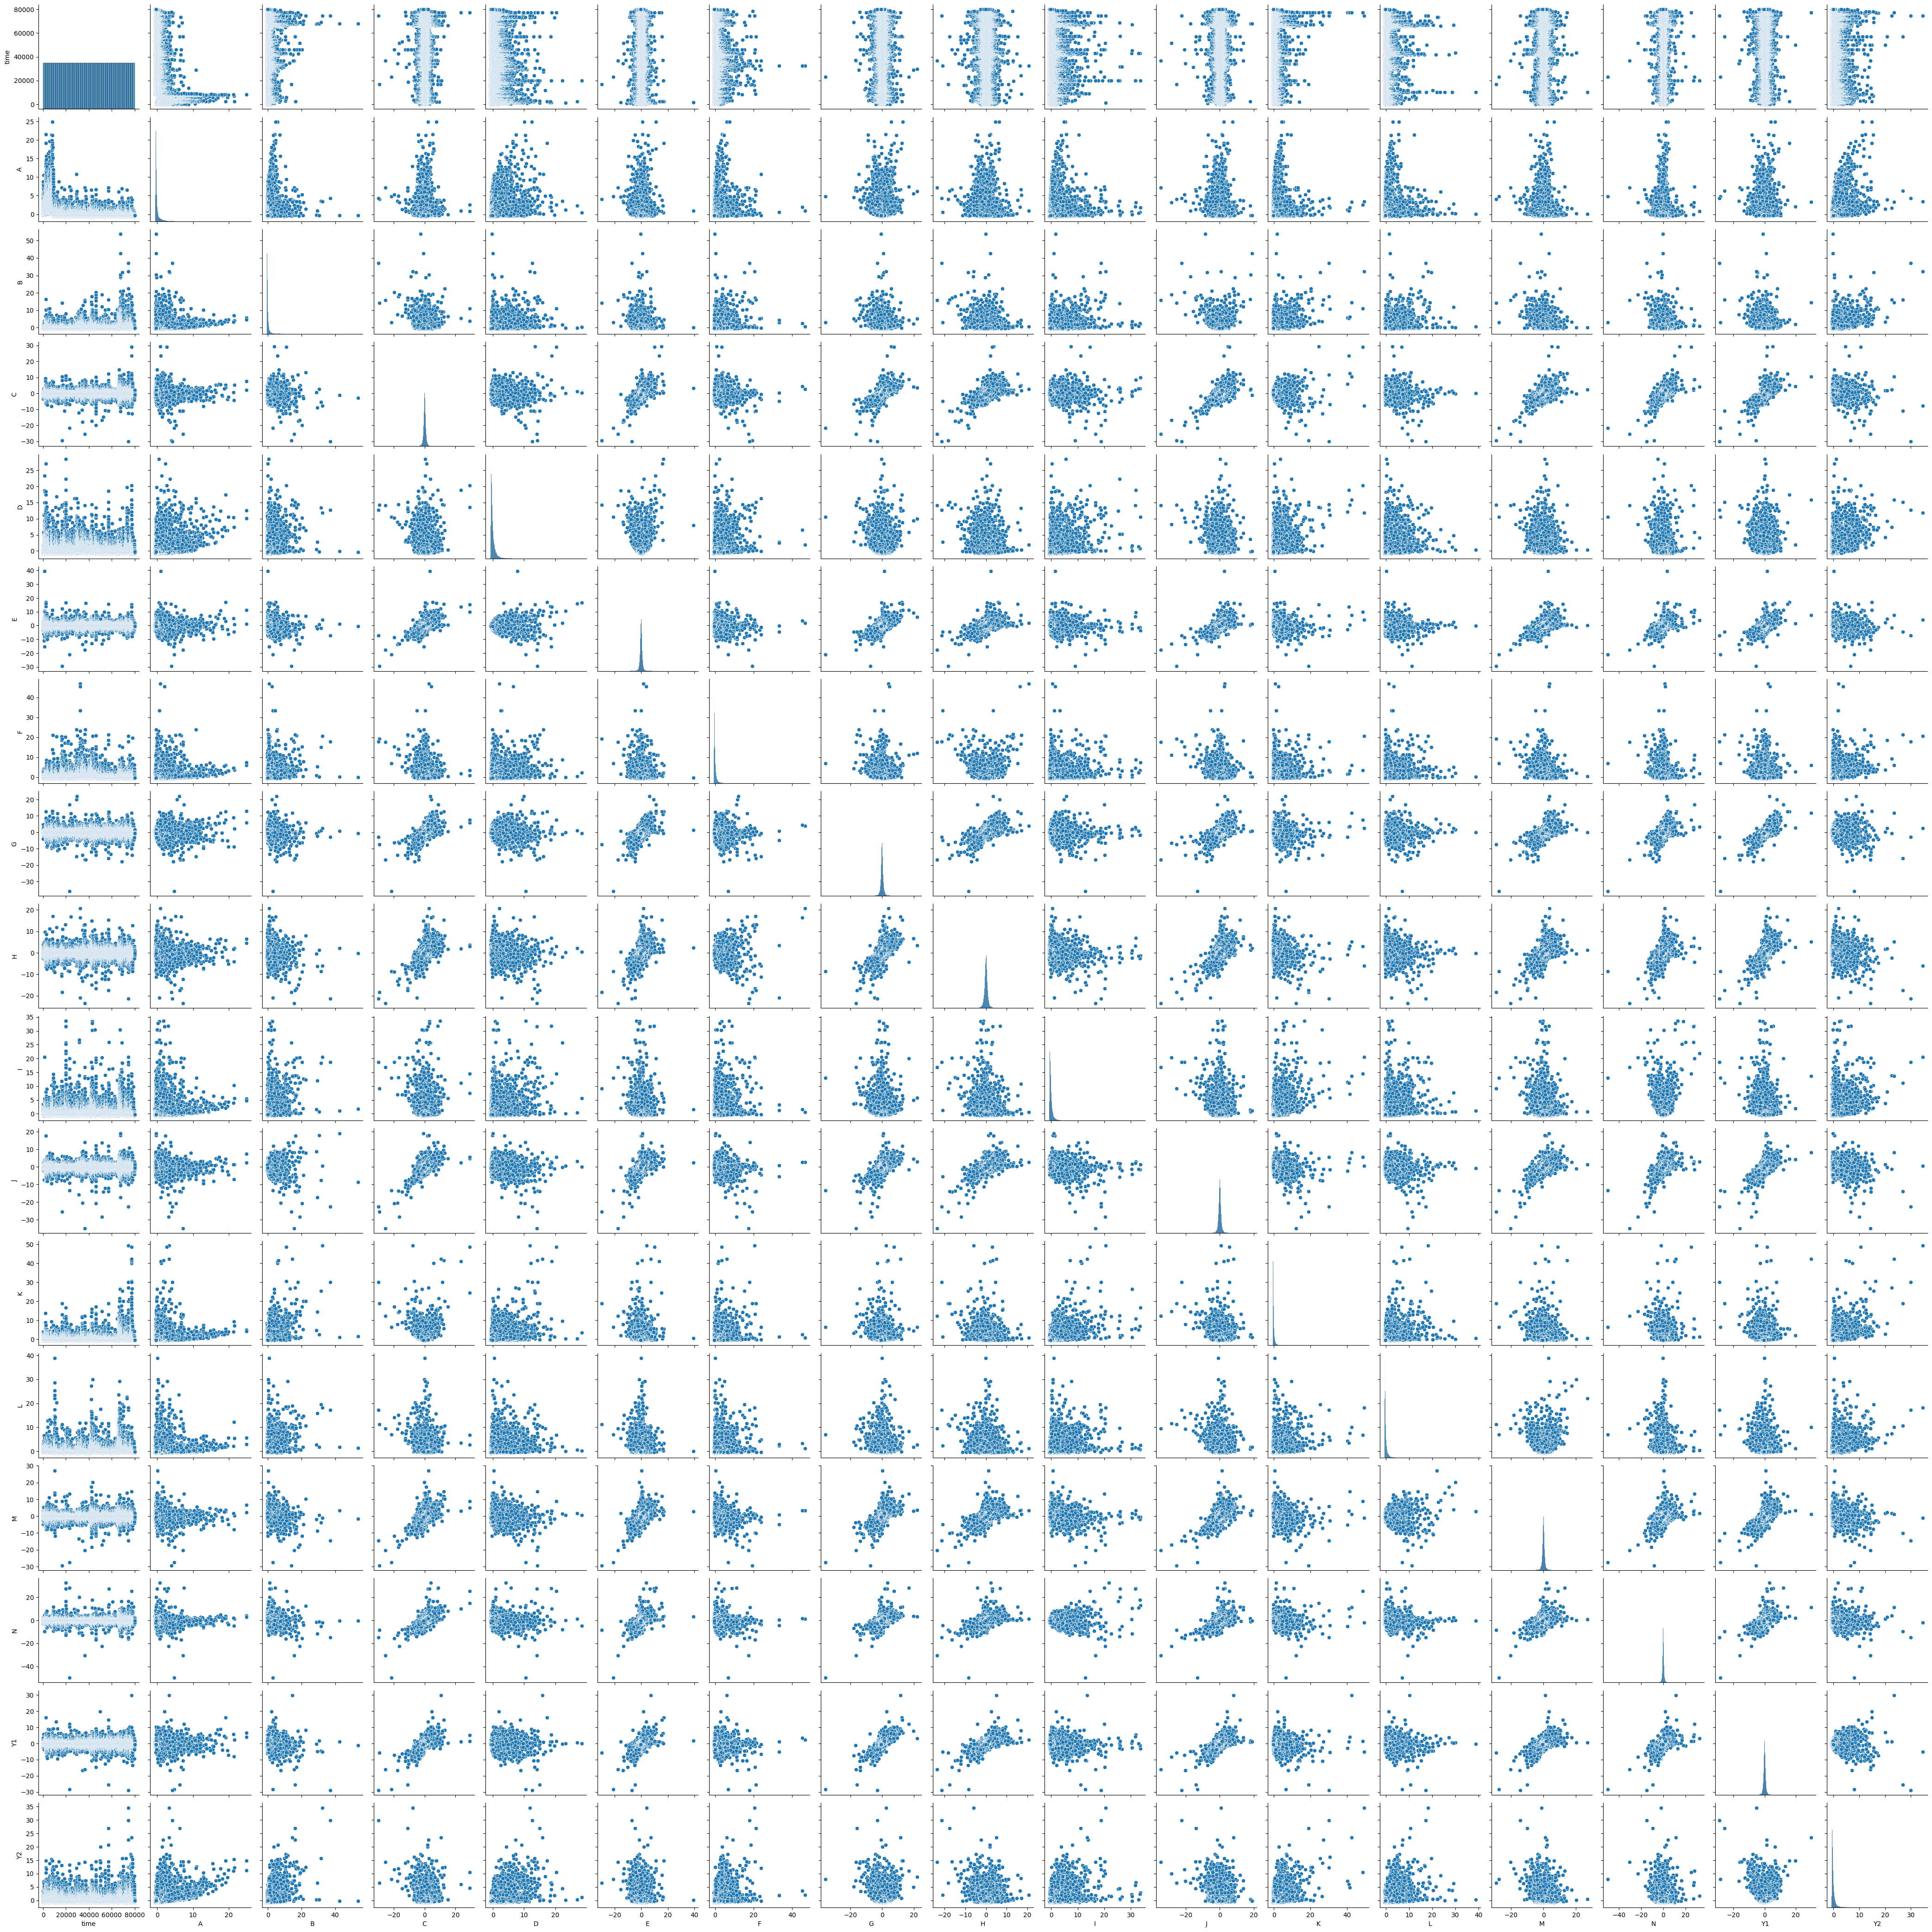

In [7]:
sb.pairplot(train_data)

Text(0.5, 1.0, 'N vs Y2')

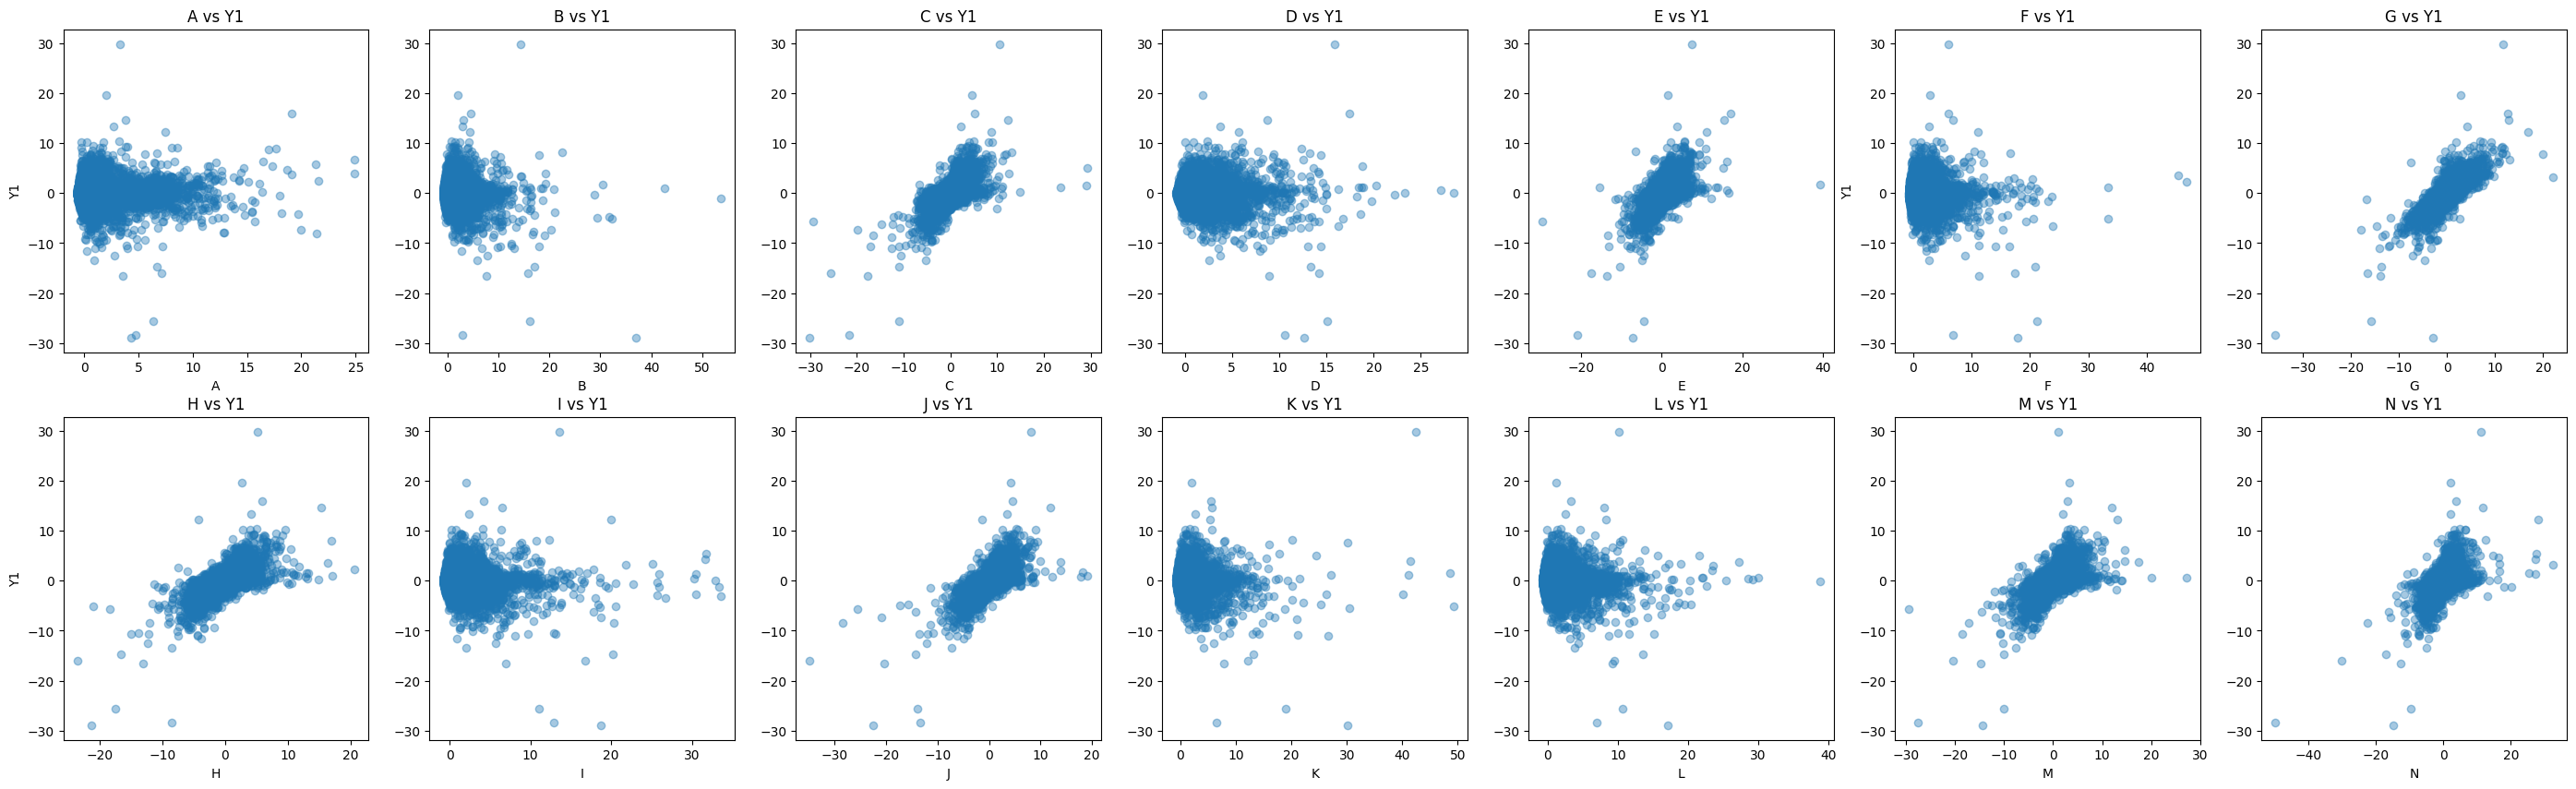

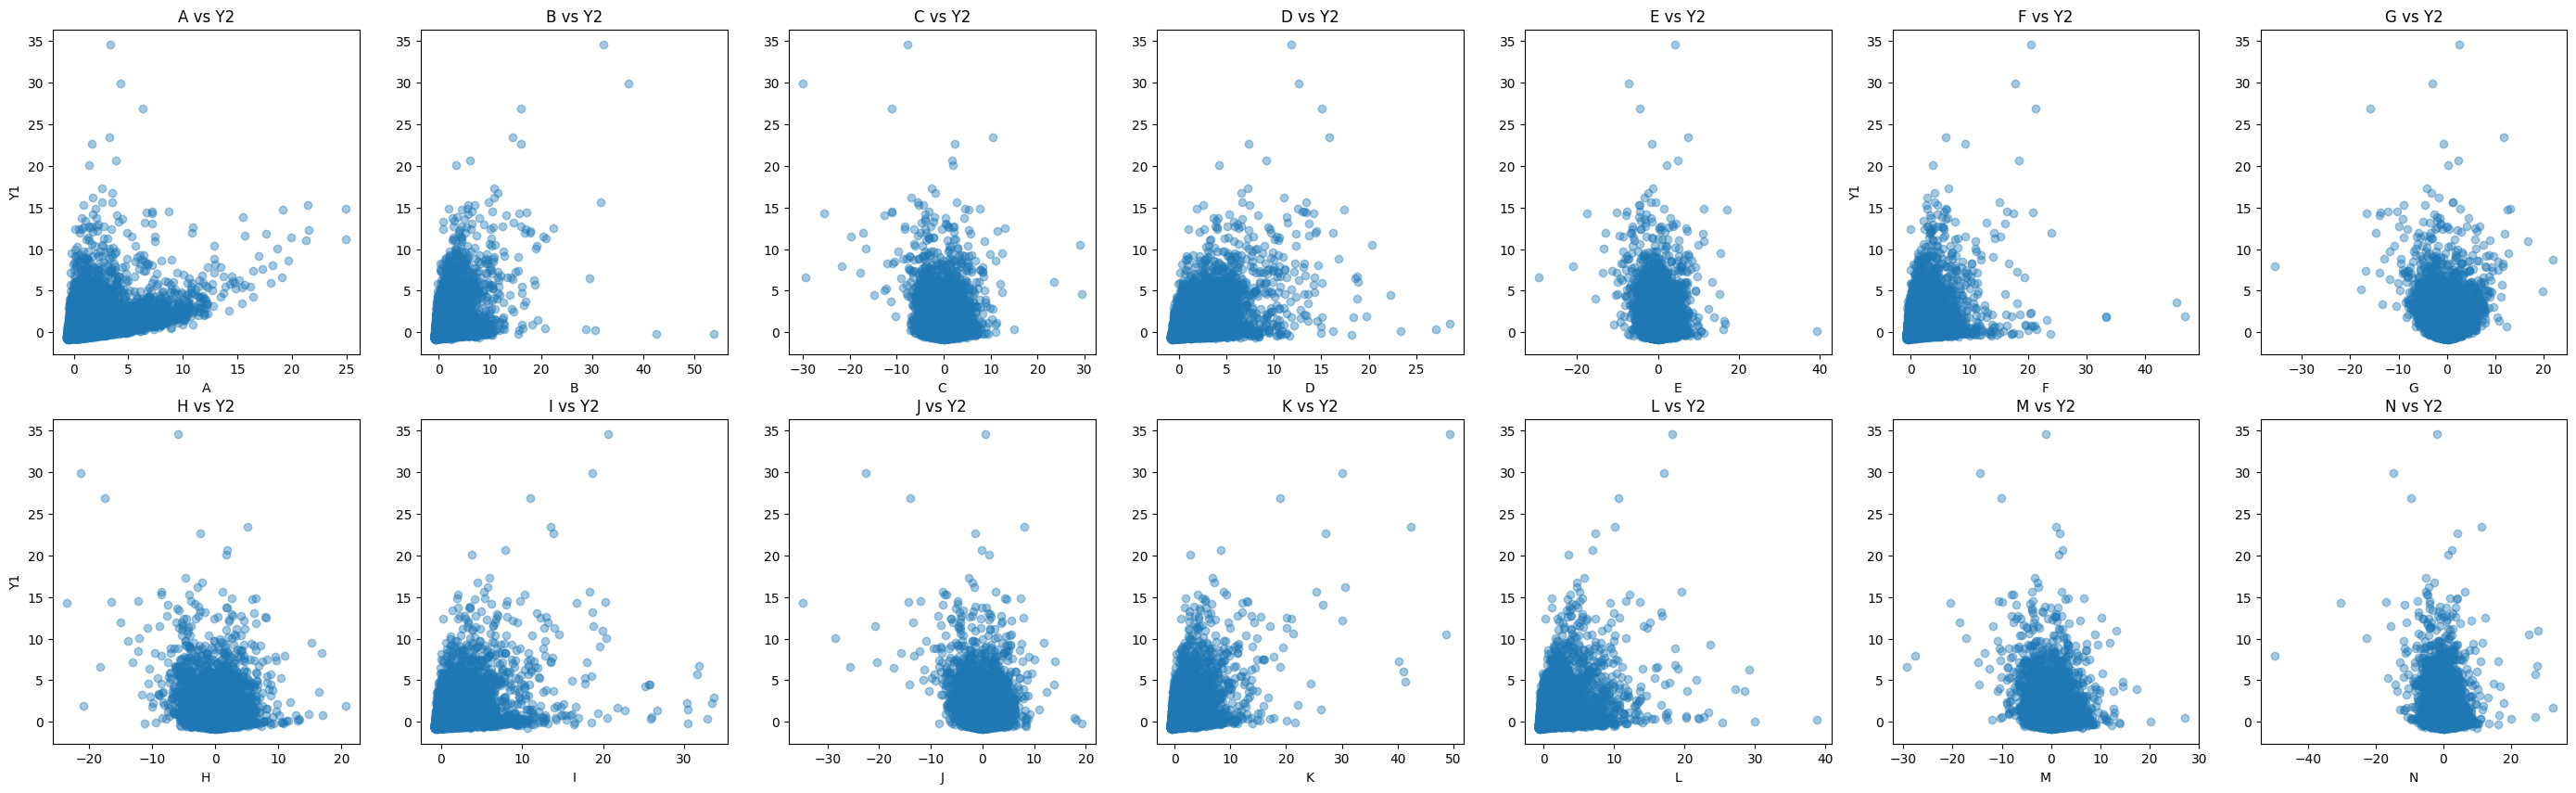

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(35,10))

axes[0,0].scatter(train_data['A'], train_data['Y1'], alpha = 0.4)
axes[0,0].set_xlabel('A')
axes[0,0].set_ylabel('Y1')
axes[0,0].set_title('A vs Y1')

axes[0,1].scatter(train_data['B'], train_data['Y1'], alpha = 0.4)
axes[0,1].set_xlabel('B')
#axes[0,1].set_ylabel('Y1')
axes[0,1].set_title('B vs Y1')

axes[0,2].scatter(train_data['C'], train_data['Y1'], alpha = 0.4)
axes[0,2].set_xlabel('C')
#axes[0,2].set_ylabel('Y1')
axes[0,2].set_title('C vs Y1')

axes[0,3].scatter(train_data['D'], train_data['Y1'], alpha = 0.4)
axes[0,3].set_xlabel('D')
#axes[0,3].set_ylabel('Y1')
axes[0,3].set_title('D vs Y1')

axes[0,4].scatter(train_data['E'], train_data['Y1'], alpha = 0.4)
axes[0,4].set_xlabel('E')
#axes[0,4].set_ylabel('Y1')
axes[0,4].set_title('E vs Y1')

axes[0,5].scatter(train_data['F'], train_data['Y1'], alpha = 0.4)
axes[0,5].set_xlabel('F')
axes[0,5].set_ylabel('Y1')
axes[0,5].set_title('F vs Y1')

axes[0,6].scatter(train_data['G'], train_data['Y1'], alpha = 0.4)
axes[0,6].set_xlabel('G')
#axes[0,6].set_ylabel('Y1')
axes[0,6].set_title('G vs Y1')

axes[1,0].scatter(train_data['H'], train_data['Y1'], alpha = 0.4)
axes[1,0].set_xlabel('H')
axes[1,0].set_ylabel('Y1')
axes[1,0].set_title('H vs Y1')

axes[1,1].scatter(train_data['I'], train_data['Y1'], alpha = 0.4)
axes[1,1].set_xlabel('I')
#axes[1,1].set_ylabel('Y1')
axes[1,1].set_title('I vs Y1')

axes[1,2].scatter(train_data['J'], train_data['Y1'], alpha = 0.4)
axes[1,2].set_xlabel('J')
#axes[1,2].set_ylabel('Y1')
axes[1,2].set_title('J vs Y1')

axes[1,3].scatter(train_data['K'], train_data['Y1'], alpha = 0.4)
axes[1,3].set_xlabel('K')
#axes[1,3].set_ylabel('Y1')
axes[1,3].set_title('K vs Y1')

axes[1,4].scatter(train_data['L'], train_data['Y1'], alpha = 0.4)
axes[1,4].set_xlabel('L')
#axes[1,4].set_ylabel('Y1')
axes[1,4].set_title('L vs Y1')

axes[1,5].scatter(train_data['M'], train_data['Y1'], alpha = 0.4)
axes[1,5].set_xlabel('M')
#axes[1,5].set_ylabel('Y1')
axes[1,5].set_title('M vs Y1')


axes[1,6].scatter(train_data['N'], train_data['Y1'], alpha = 0.4)
axes[1,6].set_xlabel('N')
#axes[1,6].set_ylabel('Y1')
axes[1,6].set_title('N vs Y1')

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(35,10))

axes[0,0].scatter(train_data['A'], train_data['Y2'], alpha = 0.4)
axes[0,0].set_xlabel('A')
axes[0,0].set_ylabel('Y1')
axes[0,0].set_title('A vs Y2')

axes[0,1].scatter(train_data['B'], train_data['Y2'], alpha = 0.4)
axes[0,1].set_xlabel('B')
#axes[0,1].set_ylabel('Y1')
axes[0,1].set_title('B vs Y2')

axes[0,2].scatter(train_data['C'], train_data['Y2'], alpha = 0.4)
axes[0,2].set_xlabel('C')
#axes[0,2].set_ylabel('Y1')
axes[0,2].set_title('C vs Y2')

axes[0,3].scatter(train_data['D'], train_data['Y2'], alpha = 0.4)
axes[0,3].set_xlabel('D')
#axes[0,3].set_ylabel('Y1')
axes[0,3].set_title('D vs Y2')

axes[0,4].scatter(train_data['E'], train_data['Y2'], alpha = 0.4)
axes[0,4].set_xlabel('E')
#axes[0,4].set_ylabel('Y1')
axes[0,4].set_title('E vs Y2')

axes[0,5].scatter(train_data['F'], train_data['Y2'], alpha = 0.4)
axes[0,5].set_xlabel('F')
axes[0,5].set_ylabel('Y1')
axes[0,5].set_title('F vs Y2')

axes[0,6].scatter(train_data['G'], train_data['Y2'], alpha = 0.4)
axes[0,6].set_xlabel('G')
#axes[0,6].set_ylabel('Y1')
axes[0,6].set_title('G vs Y2')

axes[1,0].scatter(train_data['H'], train_data['Y2'], alpha = 0.4)
axes[1,0].set_xlabel('H')
axes[1,0].set_ylabel('Y1')
axes[1,0].set_title('H vs Y2')

axes[1,1].scatter(train_data['I'], train_data['Y2'], alpha = 0.4)
axes[1,1].set_xlabel('I')
#axes[1,1].set_ylabel('Y1')
axes[1,1].set_title('I vs Y2')

axes[1,2].scatter(train_data['J'], train_data['Y2'], alpha = 0.4)
axes[1,2].set_xlabel('J')
#axes[1,2].set_ylabel('Y1')
axes[1,2].set_title('J vs Y2')

axes[1,3].scatter(train_data['K'], train_data['Y2'], alpha = 0.4)
axes[1,3].set_xlabel('K')
#axes[1,3].set_ylabel('Y1')
axes[1,3].set_title('K vs Y2')

axes[1,4].scatter(train_data['L'], train_data['Y2'], alpha = 0.4)
axes[1,4].set_xlabel('L')
#axes[1,4].set_ylabel('Y1')
axes[1,4].set_title('L vs Y2')

axes[1,5].scatter(train_data['M'], train_data['Y2'], alpha = 0.4)
axes[1,5].set_xlabel('M')
#axes[1,5].set_ylabel('Y1')
axes[1,5].set_title('M vs Y2')


axes[1,6].scatter(train_data['N'], train_data['Y2'], alpha = 0.4)
axes[1,6].set_xlabel('N')
#axes[1,6].set_ylabel('Y2')
axes[1,6].set_title('N vs Y2')

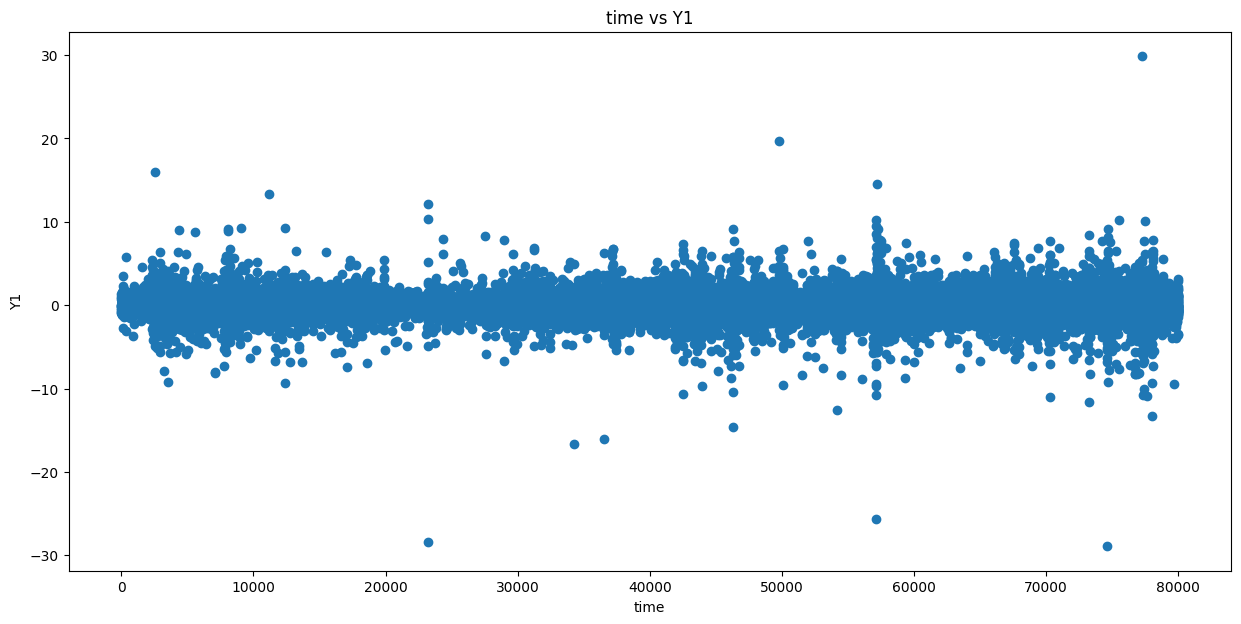

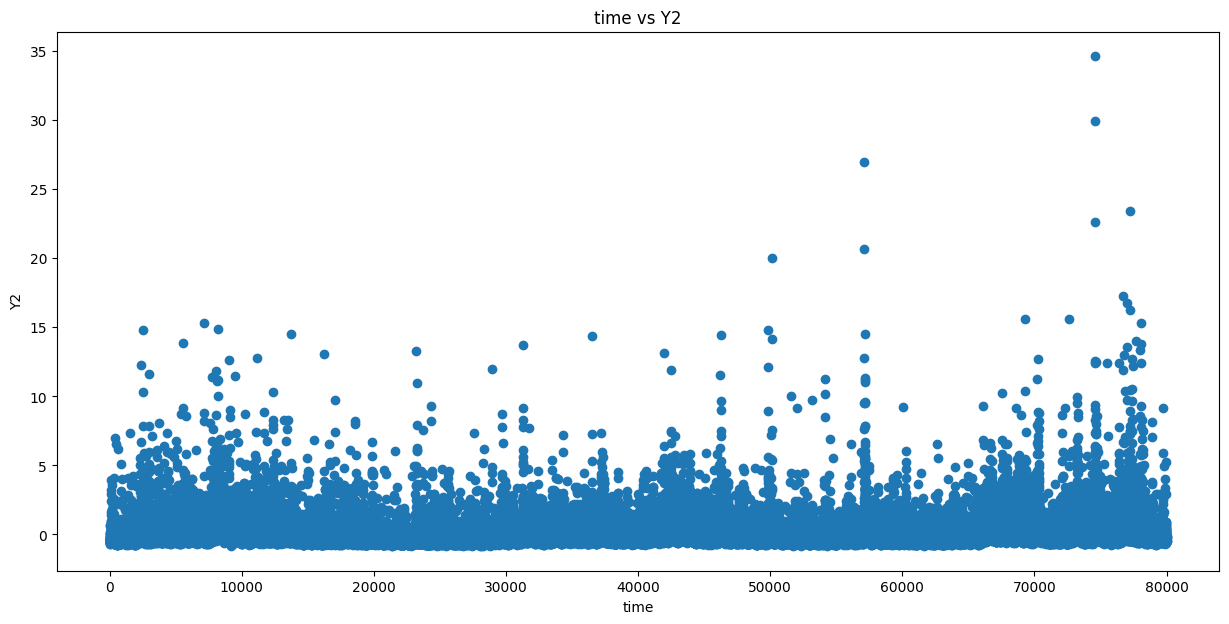

In [11]:
plt.figure(figsize=(15, 7))
plt.scatter(train_data['time'], train_data['Y1'])
plt.xlabel('time')
plt.ylabel('Y1')
plt.title('time vs Y1')
plt.show()

plt.figure(figsize=(15, 7))
plt.scatter(train_data['time'], train_data['Y2'])
plt.xlabel('time')
plt.ylabel('Y2')
plt.title('time vs Y2')
plt.show()

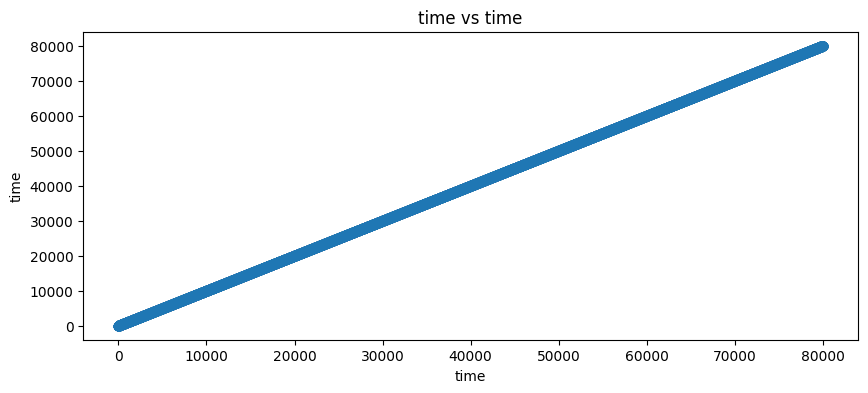

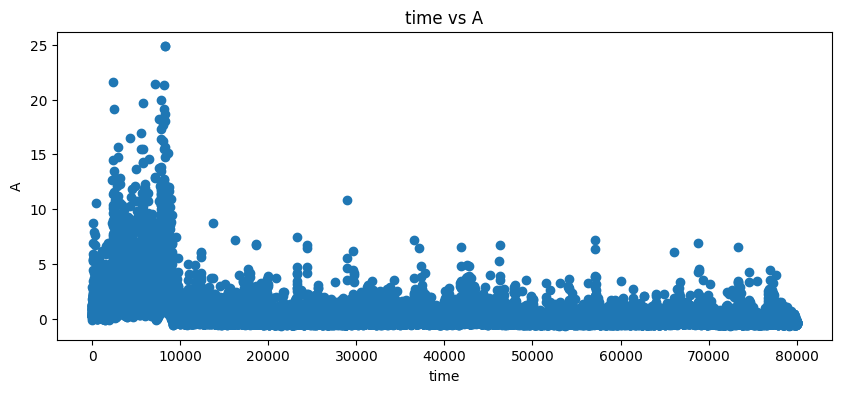

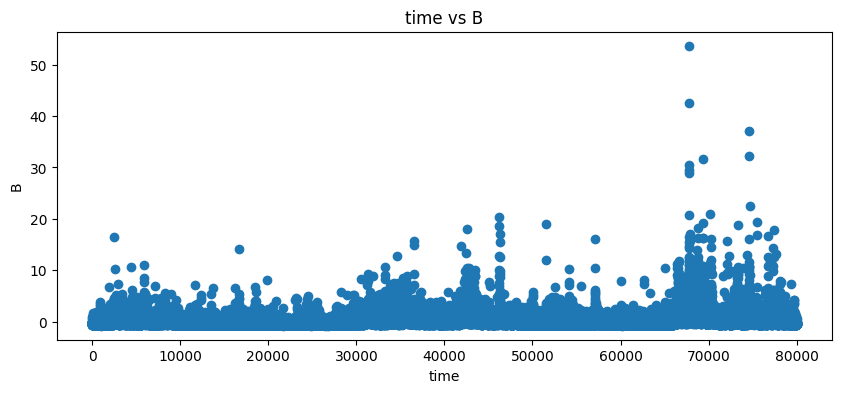

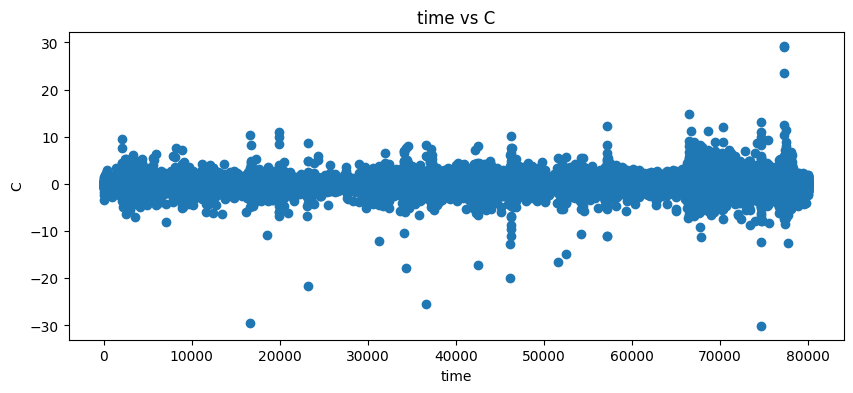

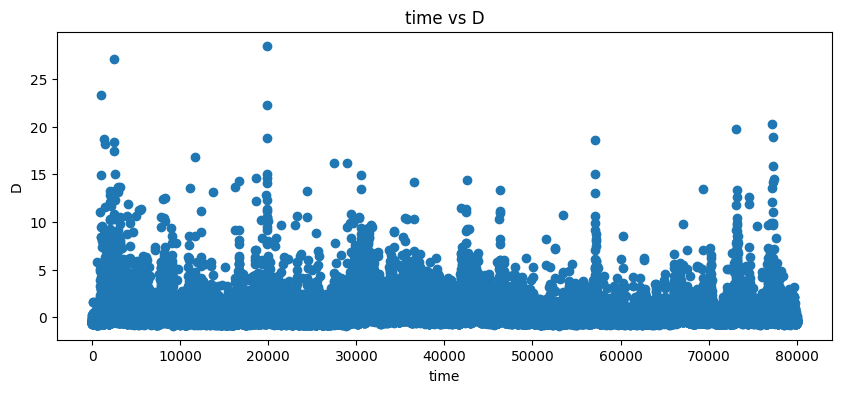

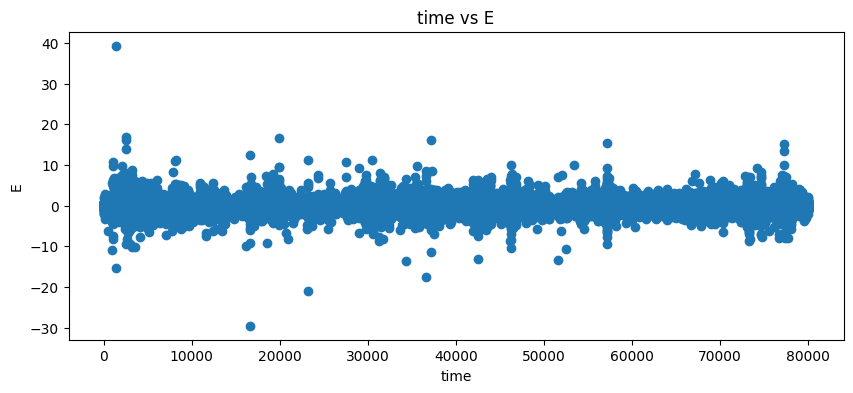

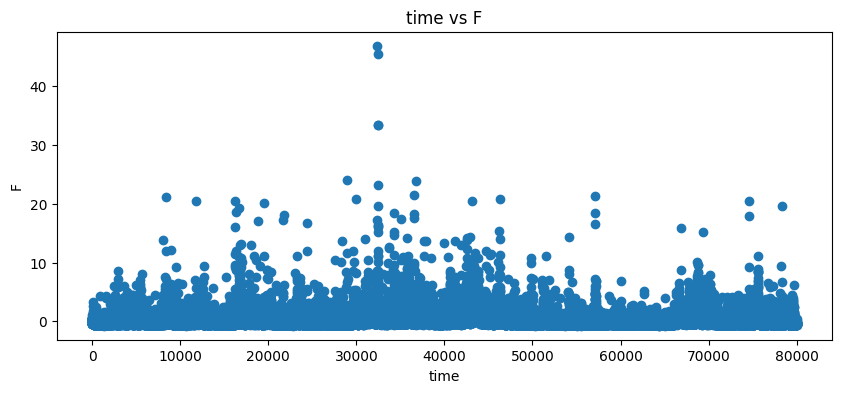

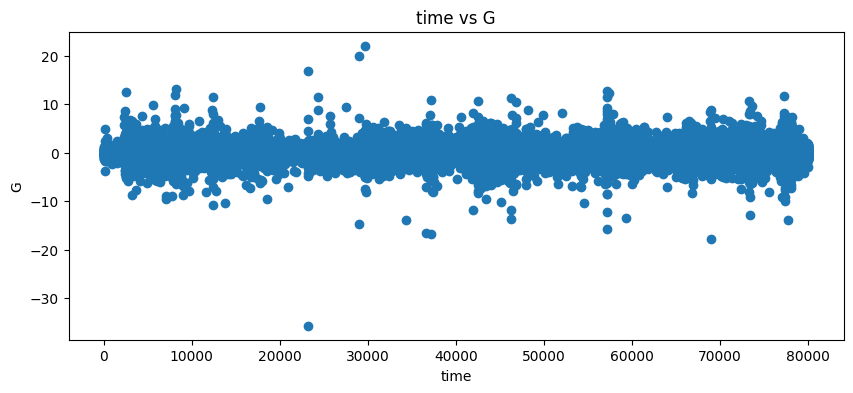

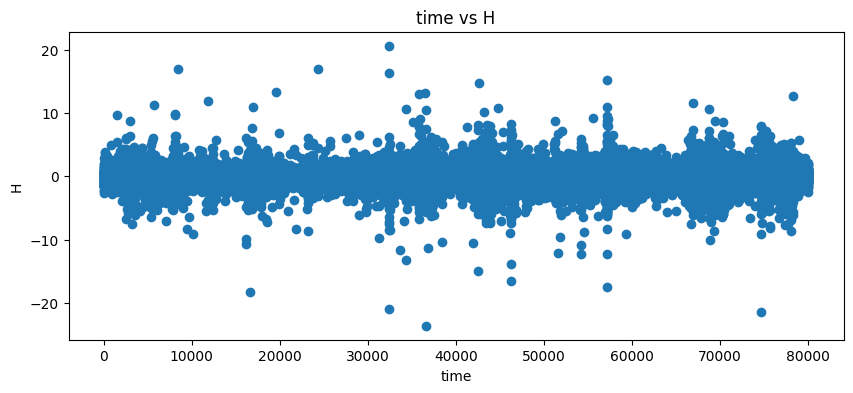

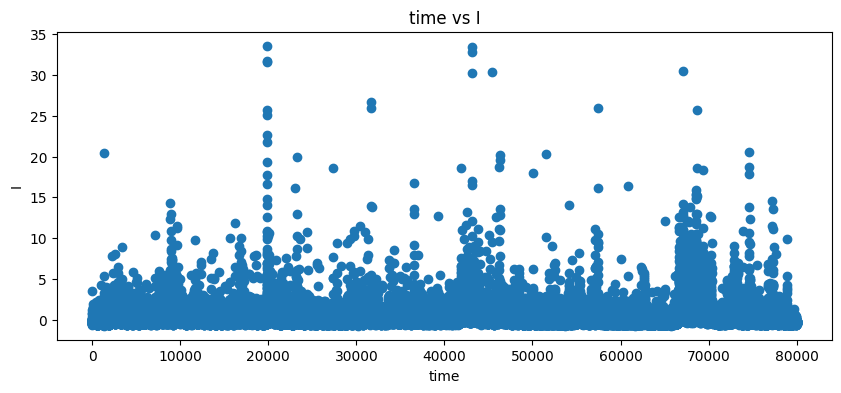

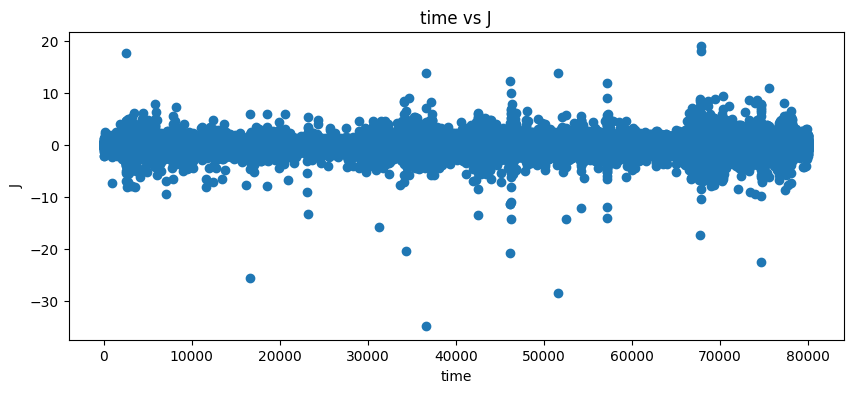

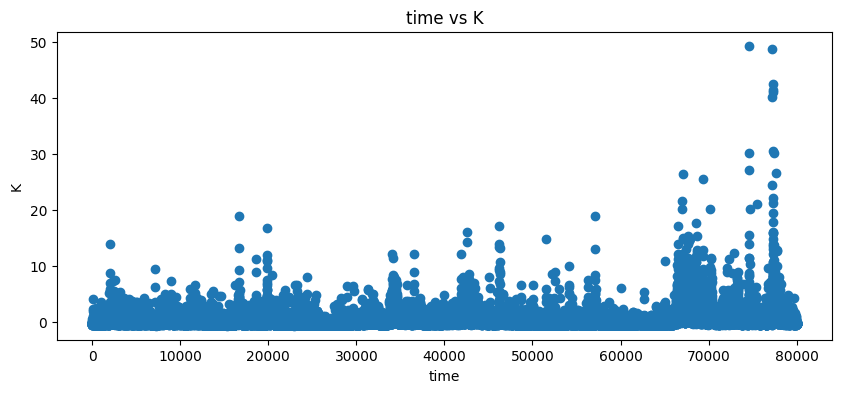

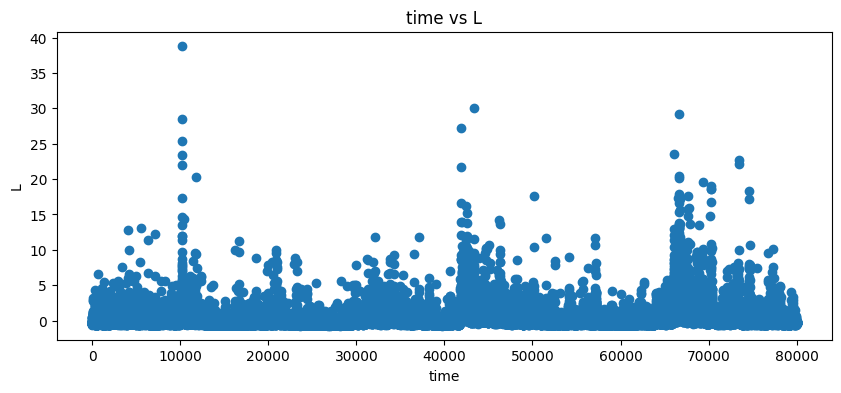

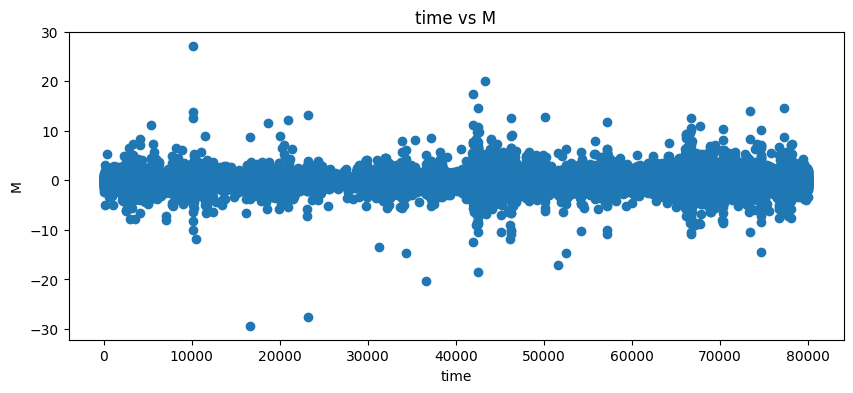

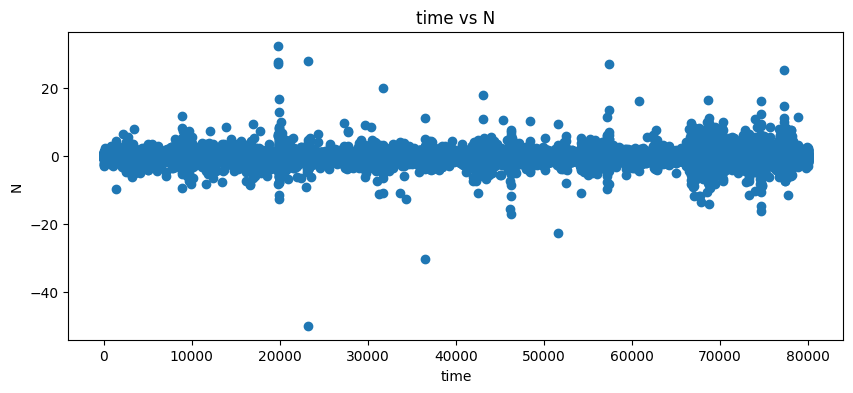

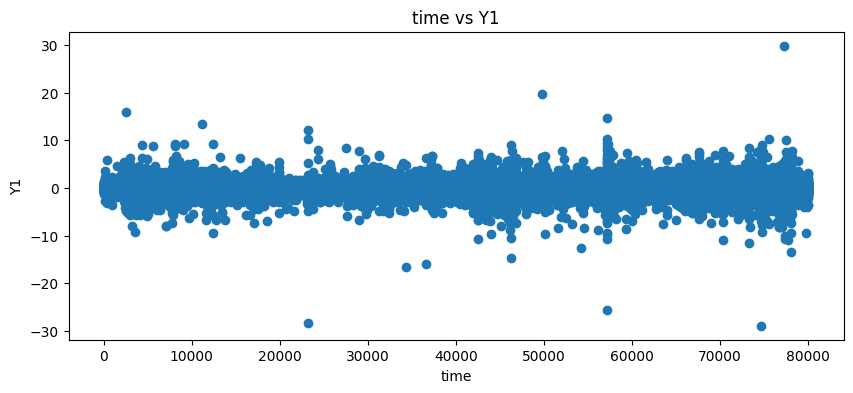

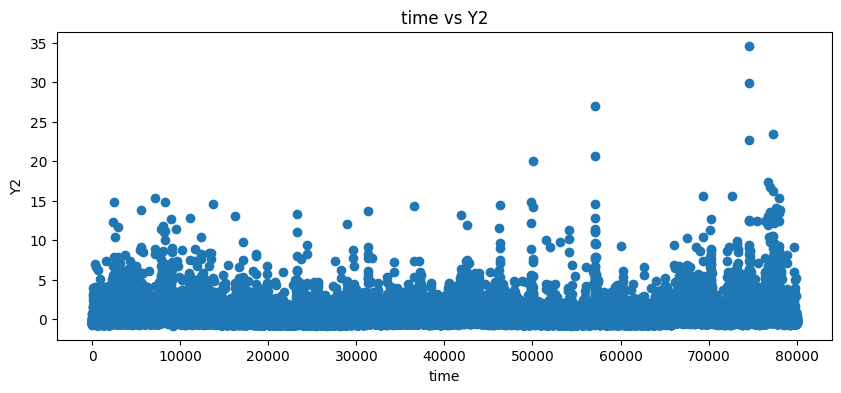

In [14]:
for column in train_data:
    plt.figure(figsize=(10, 4))
    plt.scatter(train_data['time'], train_data[column])
    plt.xlabel('time')
    plt.ylabel(column)
    plt.title(f'time vs {column}')
    plt.show()